### Merge Fill

Originally, the purpose of this notebook was to merge model run outputs.

Many changes have occured since this was written that make it impractical.

The cli used to output ``netcdf`` files. LustreFS had file locking issues when writing to these files causing outputs to be written to files as incomplete results even though the model calculated them fully. This caused many silent errors, the IO portion of the pipeline has been modified to use zarr. This change eliminated many of the reliability problems that motivated the need for this notebook.

In [1]:
import inspire_agrivolt
from pathlib import Path
import xarray as xr
import pvdeg

pvdeg.geospatial.start_dask()

### Define Input and Output Paths

In [28]:
conf = "05"

MODEL_OUTPUTS_PATH = f"/projects/inspire/PySAM-MAPS/v0.5/colorado/{conf}"
FILL_PATH = ""

OUTPUT_ZARR_PATH=f"/projects/inspire/PySAM-MAPS/v0.5/colorado/{conf}.zarr"

### Run Mapping to Zarr

Fill path is an empty string because we have no fill to provide in this case. We are just merging all the netcdfs to a zarr.

In [18]:
inspire_agrivolt.merge_original_fill_data_to_zarr(
    scenario=conf,
    state="colorado",
    MODEL_OUT_DIR_A=MODEL_OUTPUTS_PATH,
    MODEL_OUT_DIR_B=FILL_PATH,
    OUTPUT_ZARR_PATH=OUTPUT_ZARR_PATH
)

starting colorado 10
2025-09-11 18:29:03,242 - inspire_agrivolt - INFO - Starting merge for state=colorado scenario=10
2025-09-11 18:29:03,251 - inspire_agrivolt - INFO - validating files in /projects/inspire/PySAM-MAPS/v0.5/colorado/10 and 
BAD FILE: /projects/inspire/PySAM-MAPS/v0.5/colorado/10/429799-432536.nc
Unable to synchronously open file (file signature not found)
BAD FILE: /projects/inspire/PySAM-MAPS/v0.5/colorado/10/444521-447376.nc
Unable to synchronously open file (file signature not found)
BAD FILE: /projects/inspire/PySAM-MAPS/v0.5/colorado/10/462555-466358.nc
Unable to synchronously open file (file signature not found)
BAD FILE: /projects/inspire/PySAM-MAPS/v0.5/colorado/10/508311-511438.nc
Unable to synchronously open file (file signature not found)
BAD FILE: /projects/inspire/PySAM-MAPS/v0.5/colorado/10/545001-549140.nc
Unable to synchronously open file (file signature not found)
2025-09-11 18:29:10,258 - inspire_agrivolt - WARNING - Skipping 5 bad NC files in /proje

/home/tford/.conda-envs/geospatial/lib/python3.9/site-packages/xarray/core/dataset.py:277: UserWarning: The specified chunks separate the stored chunks along dimension "phony_dim_1" starting at index 500. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


2025-09-11 18:29:19,654 - inspire_agrivolt - INFO - loaded NSRDB metadata
2025-09-11 18:29:29,663 - inspire_agrivolt - INFO - Finished merge → /projects/inspire/PySAM-MAPS/v0.5/colorado/10.zarr
ending colorado 10


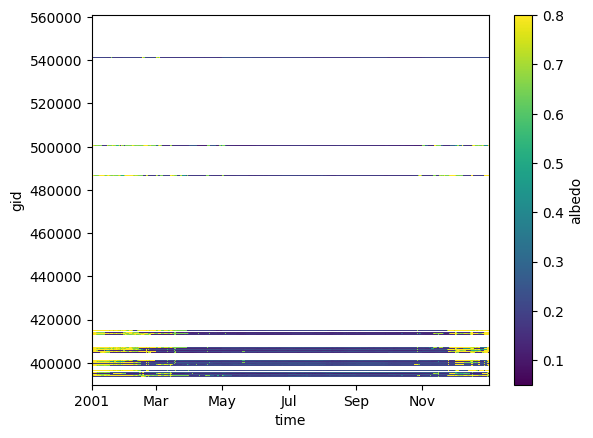

In [20]:
xr.open_zarr(OUTPUT_ZARR_PATH).albedo.plot()

/home/tford/.conda-envs/geospatial/lib/python3.9/site-packages/xarray/core/dataset.py:277: UserWarning: The specified chunks separate the stored chunks along dimension "phony_dim_1" starting at index 500. This could degrade performance. Instead, consider rechunking after loading.
  warnings.warn(


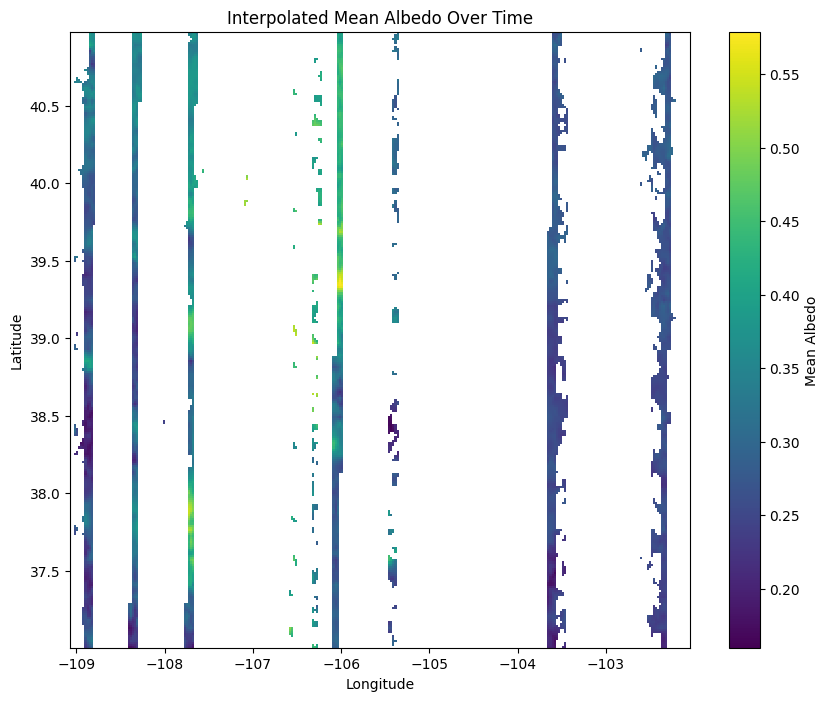

In [29]:
inspire_agrivolt.visualize_empty_data(xr.open_zarr(OUTPUT_ZARR_PATH), "colorado")